In [134]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pandas import read_excel

from sklearn import metrics

from sklearn.pipeline import Pipeline

from sklearn import model_selection

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder

from sklearn import ensemble

#import category_encoders as ce

import pickle

In [135]:
#my_sheet = 'Sheet1' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = '../data/corridas.xlsx' # change it to the name of your excel file
df = read_excel(file_name)

In [136]:
df

,Date,Distancia,Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m)
0,2022-02-13 09:53:12,5.01,34:22,6:51,875.0,3220,147
1,2022-02-06 09:34:34,2.90,33:30,11:34,519.0,1800,93
2,2022-02-05 09:14:42,8.00,54:55,6:52,875.0,5260,240
3,2022-02-02 07:39:37,5.09,35:05,6:53,871.0,3370,172
4,2022-01-30 10:58:47,5.42,37:12,6:52,874.0,3550,164
...,...,...,...,...,...,...,...
390,2015-05-31 08:45:46,17.30,1:55:01,6:39,902.0,13810,266
391,2015-05-24 10:20:25,13.62,1:35:20,7:00,857.0,10800,208
392,2015-05-03 09:44:33,10.89,1:20:27,7:23,812.0,8430,187
393,2015-04-26 10:52:26,11.10,1:12:07,6:30,924.0,8290,165


In [137]:
df['Week_Number'] = df['Date'].dt.year.astype(str) + '-' + (df['Date'].dt.week + 100).astype(str).str[1:3]
df['dia_semana'] = (df['Date'].dt.weekday + 100).astype(str).str[1:3]
df

C:\Users\csati\AppData\Local\Temp/ipykernel_13000/1195871656.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week_Number'] = df['Date'].dt.year.astype(str) + '-' + (df['Date'].dt.week + 100).astype(str).str[1:3]


,Date,Distancia,Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Week_Number,dia_semana
0,2022-02-13 09:53:12,5.01,34:22,6:51,875.0,3220,147,2022-06,06
1,2022-02-06 09:34:34,2.90,33:30,11:34,519.0,1800,93,2022-05,06
2,2022-02-05 09:14:42,8.00,54:55,6:52,875.0,5260,240,2022-05,05
3,2022-02-02 07:39:37,5.09,35:05,6:53,871.0,3370,172,2022-05,02
4,2022-01-30 10:58:47,5.42,37:12,6:52,874.0,3550,164,2022-04,06
...,...,...,...,...,...,...,...,...,...
390,2015-05-31 08:45:46,17.30,1:55:01,6:39,902.0,13810,266,2015-22,06
391,2015-05-24 10:20:25,13.62,1:35:20,7:00,857.0,10800,208,2015-21,06
392,2015-05-03 09:44:33,10.89,1:20:27,7:23,812.0,8430,187,2015-18,06
393,2015-04-26 10:52:26,11.10,1:12:07,6:30,924.0,8290,165,2015-17,06


In [138]:
df['dia_semana'].unique()

array(['06', '05', '02', '03', '01', '04', '00'], dtype=object)

In [139]:
df['vol_semanal'] = df['Distancia'].groupby(df['Week_Number']).transform('sum')

In [140]:
df

,Date,Distancia,Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Week_Number,dia_semana,vol_semanal
0,2022-02-13 09:53:12,5.01,34:22,6:51,875.0,3220,147,2022-06,06,5.01
1,2022-02-06 09:34:34,2.90,33:30,11:34,519.0,1800,93,2022-05,06,15.99
2,2022-02-05 09:14:42,8.00,54:55,6:52,875.0,5260,240,2022-05,05,15.99
3,2022-02-02 07:39:37,5.09,35:05,6:53,871.0,3370,172,2022-05,02,15.99
4,2022-01-30 10:58:47,5.42,37:12,6:52,874.0,3550,164,2022-04,06,17.25
...,...,...,...,...,...,...,...,...,...,...
390,2015-05-31 08:45:46,17.30,1:55:01,6:39,902.0,13810,266,2015-22,06,17.30
391,2015-05-24 10:20:25,13.62,1:35:20,7:00,857.0,10800,208,2015-21,06,13.62
392,2015-05-03 09:44:33,10.89,1:20:27,7:23,812.0,8430,187,2015-18,06,10.89
393,2015-04-26 10:52:26,11.10,1:12:07,6:30,924.0,8290,165,2015-17,06,16.48


In [141]:
df['vol_semanal_ant'] = df.vol_semanal.shift(-1)

In [143]:
df['vol_semanal_ant2'] = df.vol_semanal.shift(-2)
df


,Date,Distancia,Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Week_Number,dia_semana,vol_semanal,vol_semanal_ant,vol_semanal_ant2
0,2022-02-13 09:53:12,5.01,34:22,6:51,875.0,3220,147,2022-06,06,5.01,15.99,15.99
1,2022-02-06 09:34:34,2.90,33:30,11:34,519.0,1800,93,2022-05,06,15.99,15.99,15.99
2,2022-02-05 09:14:42,8.00,54:55,6:52,875.0,5260,240,2022-05,05,15.99,15.99,17.25
3,2022-02-02 07:39:37,5.09,35:05,6:53,871.0,3370,172,2022-05,02,15.99,17.25,17.25
4,2022-01-30 10:58:47,5.42,37:12,6:52,874.0,3550,164,2022-04,06,17.25,17.25,17.25
...,...,...,...,...,...,...,...,...,...,...,...,...
390,2015-05-31 08:45:46,17.30,1:55:01,6:39,902.0,13810,266,2015-22,06,17.30,13.62,10.89
391,2015-05-24 10:20:25,13.62,1:35:20,7:00,857.0,10800,208,2015-21,06,13.62,10.89,16.48
392,2015-05-03 09:44:33,10.89,1:20:27,7:23,812.0,8430,187,2015-18,06,10.89,16.48,16.48
393,2015-04-26 10:52:26,11.10,1:12:07,6:30,924.0,8290,165,2015-17,06,16.48,16.48,NaN


In [146]:
fds = []
for row in df['dia_semana']:
    if row=='06' or row=='05':
        fds.append(2)
    else:
        fds.append(1)


In [147]:
df['fds'] = fds
df

,Date,Distancia,Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Week_Number,dia_semana,vol_semanal,vol_semanal_ant,vol_semanal_ant2,fds
0,2022-02-13 09:53:12,5.01,34:22,6:51,875.0,3220,147,2022-06,06,5.01,15.99,15.99,2
1,2022-02-06 09:34:34,2.90,33:30,11:34,519.0,1800,93,2022-05,06,15.99,15.99,15.99,2
2,2022-02-05 09:14:42,8.00,54:55,6:52,875.0,5260,240,2022-05,05,15.99,15.99,17.25,2
3,2022-02-02 07:39:37,5.09,35:05,6:53,871.0,3370,172,2022-05,02,15.99,17.25,17.25,1
4,2022-01-30 10:58:47,5.42,37:12,6:52,874.0,3550,164,2022-04,06,17.25,17.25,17.25,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2015-05-31 08:45:46,17.30,1:55:01,6:39,902.0,13810,266,2015-22,06,17.30,13.62,10.89,2
391,2015-05-24 10:20:25,13.62,1:35:20,7:00,857.0,10800,208,2015-21,06,13.62,10.89,16.48,2
392,2015-05-03 09:44:33,10.89,1:20:27,7:23,812.0,8430,187,2015-18,06,10.89,16.48,16.48,2
393,2015-04-26 10:52:26,11.10,1:12:07,6:30,924.0,8290,165,2015-17,06,16.48,16.48,NaN,2


In [148]:
df = df[df['vol_semanal_ant2'].notna()]
df

,Date,Distancia,Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Week_Number,dia_semana,vol_semanal,vol_semanal_ant,vol_semanal_ant2,fds
0,2022-02-13 09:53:12,5.01,34:22,6:51,875.0,3220,147,2022-06,06,5.01,15.99,15.99,2
1,2022-02-06 09:34:34,2.90,33:30,11:34,519.0,1800,93,2022-05,06,15.99,15.99,15.99,2
2,2022-02-05 09:14:42,8.00,54:55,6:52,875.0,5260,240,2022-05,05,15.99,15.99,17.25,2
3,2022-02-02 07:39:37,5.09,35:05,6:53,871.0,3370,172,2022-05,02,15.99,17.25,17.25,1
4,2022-01-30 10:58:47,5.42,37:12,6:52,874.0,3550,164,2022-04,06,17.25,17.25,17.25,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,2015-10-25 11:25:29,5.23,37:21,7:08,841.0,4210,85,2015-43,06,5.23,9.67,17.30,2
389,2015-06-07 08:44:31,9.67,1:05:15,6:45,889.0,7730,170,2015-23,06,9.67,17.30,13.62,2
390,2015-05-31 08:45:46,17.30,1:55:01,6:39,902.0,13810,266,2015-22,06,17.30,13.62,10.89,2
391,2015-05-24 10:20:25,13.62,1:35:20,7:00,857.0,10800,208,2015-21,06,13.62,10.89,16.48,2


In [149]:
X_train, X_test, y_train, y_test = model_selection.train_test_split( df[['dia_semana','vol_semanal_ant','vol_semanal_ant2']],
                                                                     df['Distancia'],
                                                                     random_state=1992,
                                                                     test_size=0.25,
                                                                     shuffle=False)

In [150]:
X_train

,dia_semana,vol_semanal_ant,vol_semanal_ant2
0,06,15.99,15.99
1,06,15.99,15.99
2,05,15.99,17.25
3,02,17.25,17.25
4,06,17.25,17.25
...,...,...,...
289,00,12.83,12.83
290,04,12.83,21.00
291,02,21.00,21.00
292,06,21.00,21.00


In [151]:
model_rf = ensemble.RandomForestRegressor(random_state=1992) # Definição do modelo

full_pipeline_rf = Pipeline( steps=[ ('modelo', model_rf) ] )

param_grid = { "modelo__n_estimators":[2,3,5,10,20],
               "modelo__max_depth":[None,7,8,9,10],
               "modelo__min_samples_split":[10,11,12],
               "modelo__min_samples_leaf":[1,2,5,7,10] }


search_rf = model_selection.GridSearchCV(full_pipeline_rf,
                                          param_grid,
                                          cv=5,
                                          n_jobs=-1,
                                          scoring='neg_root_mean_squared_error') # Declaração

search_rf.fit(X_train, y_train) # Executa o treinamento!!

best_model_rf = search_rf.best_estimator_

In [152]:
best_model_rf

Pipeline(steps=[('modelo',
                 RandomForestRegressor(max_depth=7, min_samples_leaf=10,
                                       min_samples_split=10, n_estimators=10,
                                       random_state=1992))])

In [153]:
y_test_pred_rf = best_model_rf.predict(X_test)
y_test_pred_rf

array([12.21110515, 18.73902315, 11.50159072,  7.79461261,  9.43142353,
        8.65533309, 11.22936913,  9.89325762, 11.94927866, 10.33615642,
        6.9039156 ,  6.96870086,  8.41164115,  8.73826322, 10.20727069,
        8.12536573,  8.98554028,  8.73826322,  9.87054148,  9.54292445,
        7.23996552,  7.14021605,  6.76542086,  7.18776336,  7.21364571,
        6.96870086,  7.32029022,  5.84240277,  6.07187584,  6.91701036,
        6.77329387,  8.12536573,  8.62594808,  8.19704126,  8.73826322,
        9.87054148,  8.65533309,  8.96596519,  6.67036352,  6.26083563,
        5.54015971,  6.2408987 ,  7.21364571,  6.54635836,  6.64451297,
        8.12536573,  8.62594808,  7.94321708,  6.41222244,  8.41848463,
        9.43461172, 10.2711901 ,  9.98327344,  9.43461172,  8.87730865,
        6.41222244,  6.88618112,  5.35677868,  5.15289915,  6.81940049,
        7.00024587,  6.75689587,  6.30420206,  7.10791873,  7.10111863,
        5.29374472,  6.41222244,  6.91124369,  7.10791873,  6.18

In [154]:
root_mean_squared_erro_rf = metrics.mean_squared_error( y_test, y_test_pred_rf) ** (1/2)

print( "Raiz do Erro Quadrático Médio XGBoost:", (-1) * root_mean_squared_erro_rf)

Raiz do Erro Quadrático Médio XGBoost: -3.399507898676397


In [155]:
X_test


,dia_semana,vol_semanal_ant,vol_semanal_ant2
294,01,42.57,42.57
295,06,42.57,42.57
296,03,42.57,21.24
297,01,21.24,21.24
298,06,21.24,20.63
...,...,...,...
388,06,9.67,17.30
389,06,17.30,13.62
390,06,13.62,10.89
391,06,10.89,16.48


In [157]:
data = {'dia_semana': 2,
        'vol_semanal_ant': [30],
        'vol_semanal_ant2': [25]
        }
best_model_rf.predict(pd.DataFrame(data))

array([9.29098581])

In [158]:
y_pred = best_model_rf.predict(df[['dia_semana','vol_semanal_ant','vol_semanal_ant2']])

In [159]:
df['pred'] = y_pred

C:\Users\csati\AppData\Local\Temp/ipykernel_13000/2934069404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred'] = y_pred


In [161]:
Pkl_Filename = "../model/best_model_rf.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(best_model_rf, file)

In [162]:
best_model_rf

Pipeline(steps=[('modelo',
                 RandomForestRegressor(max_depth=7, min_samples_leaf=10,
                                       min_samples_split=10, n_estimators=10,
                                       random_state=1992))])

In [163]:
model_loaded = pickle.load(open('../model/best_model_rf.pkl', 'rb'))

In [164]:
data = {'dia_semana': '06',
        'vol_semanal_ant': [30],
        'vol_semanal_ant2': [25]
        }
model_loaded.predict(pd.DataFrame(data))

array([12.48074269])

In [35]:
import matplotlib.pyplot as plt

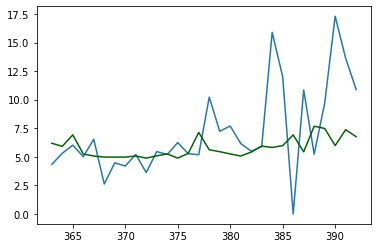

In [160]:
plt.plot(df.Distancia.tail(30))
plt.plot(df.pred.tail(30), color='darkgreen')


plt.title("")
plt.show()